In [37]:
LR = LinearRegression()
LR.fit(t[input_var], t['target'])
t['pred']=LR.predict(t[input_var])
abs(t['target']-t['pred']).mean()

2.317988221654941

# RandomForest 모델링

## 필요한 라이브러리 import

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [24]:
train = pd.read_csv("./open/train.csv")
test = pd.read_csv("./open/test.csv")

In [25]:
le = LabelEncoder()
train['snowing'] = pd.Series(le.fit_transform(train['snowing']))
test['snowing'] = pd.Series(le.fit_transform(test['snowing']))

In [26]:
train.head()

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,0,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,0,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,0,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,0,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,0,15.0,1.692


In [27]:
input_var = ['temperature','pressure','humidity','wind_speed','wind_direction','precipitation','snowing','cloudiness']

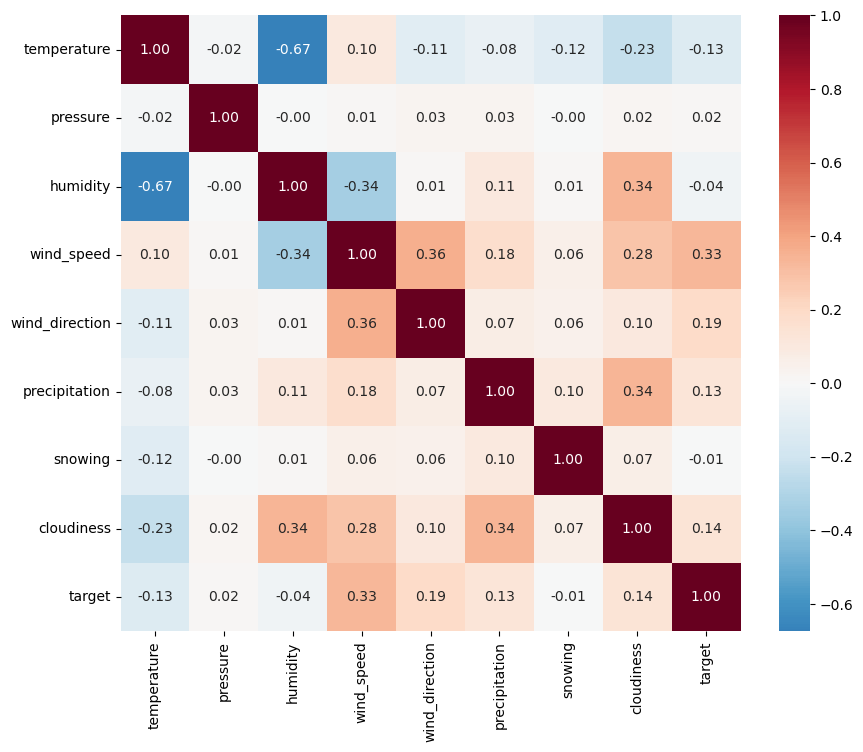

In [28]:
# 상관성 확인하기
plt.figure(figsize = (10,8))
sns.heatmap(train.drop(columns=['id'], axis=1).corr(),
           annot = True, fmt = '.2f', cmap = 'RdBu_r', center = 0)
plt.show()

/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


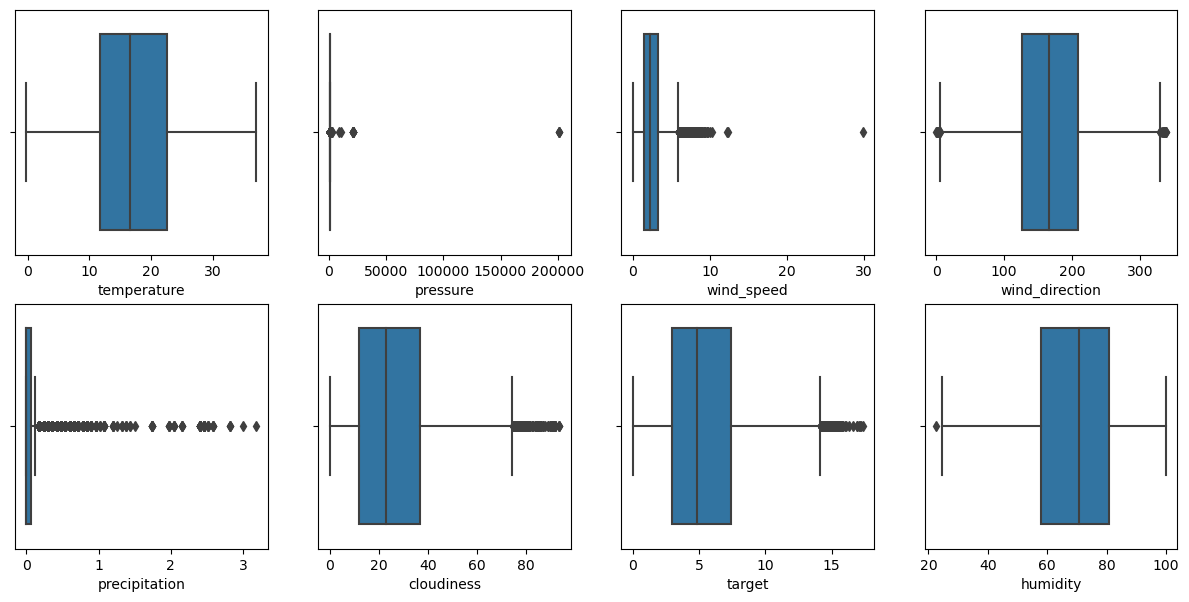

In [60]:
# 이상치 확인하기
fig, axes = plt.subplots(2,4, figsize=(15,7))
a=0;b=0

sns.boxplot(train['temperature'], ax = axes[0][0])
sns.boxplot(train['pressure'], ax = axes[0][1])
sns.boxplot(train['wind_speed'], ax = axes[0][2])
sns.boxplot(train['wind_direction'], ax = axes[0][3])
sns.boxplot(train['precipitation'], ax = axes[1][0])
sns.boxplot(train['cloudiness'], ax = axes[1][1])
sns.boxplot(train['target'], ax = axes[1][2])
sns.boxplot(train['humidity'], ax = axes[1][3])

plt.show()

/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


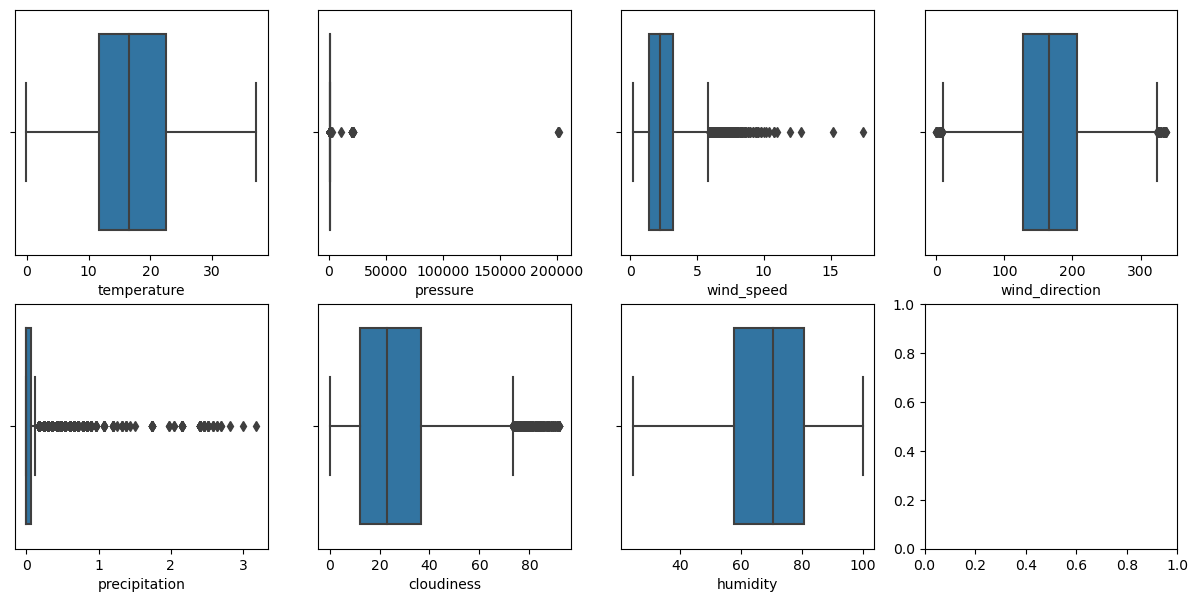

In [63]:
# 이상치 확인하기
fig, axes = plt.subplots(2,4, figsize=(15,7))
a=0;b=0

sns.boxplot(test['temperature'], ax = axes[0][0])
sns.boxplot(test['pressure'], ax = axes[0][1])
sns.boxplot(test['wind_speed'], ax = axes[0][2])
sns.boxplot(test['wind_direction'], ax = axes[0][3])
sns.boxplot(test['precipitation'], ax = axes[1][0])
sns.boxplot(test['cloudiness'], ax = axes[1][1])
sns.boxplot(test['humidity'], ax = axes[1][2])

plt.show()

In [29]:
## 이상치를 전부 제거하면 데이터가 많이 삭제되기 때문에 좋지않음! target과 가장 상관성이 높은 wind_speed의 이상치를 제거
Q1 = train.describe().loc['25%']
Q3 = train.describe().loc['75%']
IQR = Q3 - Q1
u = Q3 + 1.5 * IQR
l = Q1 - 1.5 * IQR
outline = pd.DataFrame({'lower':l, 'upper':u})
outline

,lower,upper
temperature,-4.55850,38.82950
pressure,1000.00000,1033.60000
humidity,23.30000,115.30000
wind_speed,-1.30000,5.90000
wind_direction,5.50000,329.50000
precipitation,-0.09000,0.15000
snowing,0.00000,0.00000
cloudiness,-25.50000,74.50000
target,-3.76475,14.15725


In [42]:
con1 = (train['temperature']<=outline.loc['temperature','lower']) | (train['temperature'] >= outline.loc['temperature','upper'])
con2 = (train['pressure']<=outline.loc['pressure','lower']) | (train['pressure'] >= outline.loc['pressure','upper'])
con3 = (train['humidity']<=outline.loc['humidity','lower']) | (train['humidity'] >= outline.loc['humidity','upper'])
con4 = (train['wind_speed']<=outline.loc['wind_speed','lower']) | (train['wind_speed'] >= outline.loc['wind_speed','upper'])
con5 = (train['wind_direction']<=outline.loc['wind_direction','lower']) | (train['wind_direction'] >= outline.loc['wind_direction','upper'])
con6 = (train['precipitation']<=outline.loc['precipitation','lower']) | (train['precipitation'] >= outline.loc['precipitation','upper'])
con7 = (train['snowing']<=outline.loc['snowing','lower']) | (train['snowing'] >= outline.loc['snowing','upper'])
con8 = (train['target']<=outline.loc['target','lower']) | (train['target'] >= outline.loc['target','upper'])

In [64]:
index = train[con4 | (train['pressure']>150000) | con3].index
t = train.drop(index, axis = 0)
t

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target,pred
0,TRAIN_00000,27.881600,1013.6,46.8,2.4,232.4,0.00,0,0.0,1.180,2.770011
1,TRAIN_00001,5.754000,1026.6,76.6,3.6,172.0,0.00,0,8.8,8.581,8.206608
2,TRAIN_00002,20.822000,1016.2,64.8,2.2,206.0,0.06,0,23.0,3.978,4.447046
3,TRAIN_00003,20.075800,1017.4,72.6,0.8,215.4,0.00,0,0.0,8.301,6.987148
4,TRAIN_00004,7.526000,1023.2,82.8,1.2,158.0,0.00,0,15.0,1.692,2.912926
...,...,...,...,...,...,...,...,...,...,...,...
19269,TRAIN_19269,30.234000,1016.2,45.6,4.6,186.0,0.00,0,23.0,6.500,5.685184
19270,TRAIN_19270,12.020000,1023.8,81.4,1.6,176.0,0.00,0,0.0,7.047,6.394424
19271,TRAIN_19271,17.232000,993.2,78.2,2.0,198.0,0.06,0,26.4,3.670,3.901782
19273,TRAIN_19273,19.354000,1019.4,45.4,2.4,120.0,0.06,0,20.0,12.379,9.922152


## RandomForest에 학습시키기

In [39]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(train[input_var], train['target'])
train['pred']=rf.predict(train[input_var])
abs(train['target']-train['pred']).mean()

0.7189255735171379

In [33]:
# con4만 제외한 t
rf = RandomForestRegressor(n_estimators=500)
rf.fit(t[input_var], t['target'])
t['pred']=rf.predict(t[input_var])
abs(t['target']-t['pred']).mean()

0.7175953483963929

In [53]:
# con4와 'pressure'이 150000보다 큰 것 제외한 t => 결과 젤 좋은 t!
rf = RandomForestRegressor(n_estimators=500)
rf.fit(t[input_var], t['target'])
t['pred']=rf.predict(t[input_var])
abs(t['target']-t['pred']).mean()

0.7164804892972937

In [65]:
# con4,con3 'pressure'이 150000보다 큰 것 제외한 t
rf = RandomForestRegressor(n_estimators=500)
rf.fit(t[input_var], t['target'])
t['pred']=rf.predict(t[input_var])
abs(t['target']-t['pred']).mean()

0.7167124011879956

<function matplotlib.pyplot.show(close=None, block=None)>

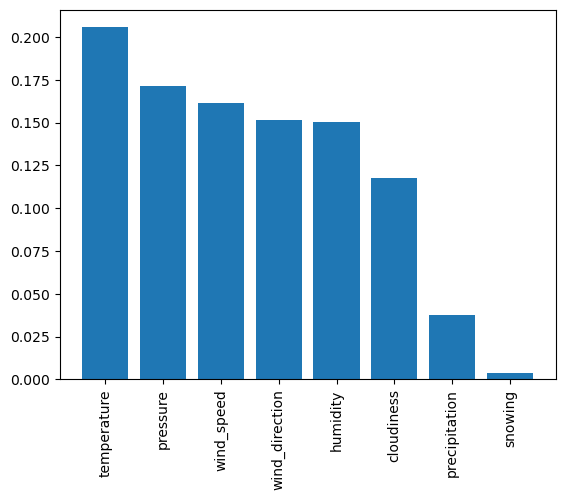

In [40]:
# 변수중요도가 큰 순으로 input variables
imt = pd.DataFrame({'var':input_var, 'import':rf.feature_importances_}).sort_values(by='import',ascending=False)

plt.bar(imt['var'], imt['import'])
plt.xticks(rotation=90)
plt.show

## 파라미터 조정

1
2
3
4
5
6
7
8


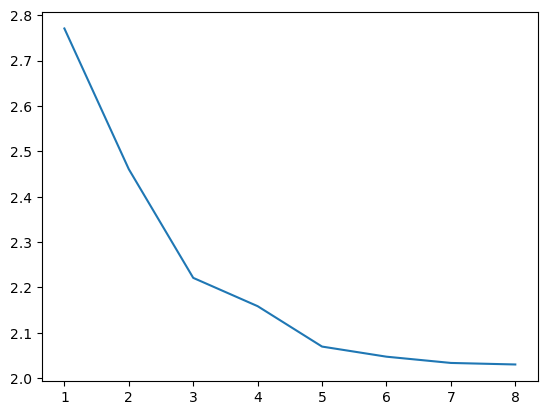

In [14]:
# input 변수 개수는 몇 개가 좋을 지?
score_list = [] # MAE 점수 리스트
varnum = [] # input variables 개수 리스트

for i in range(1,len(imt)+1):
    select_var = imt['var'].iloc[:i].to_list()
    scores = cross_val_score(rf, t[select_var], t['target'], scoring = 'neg_mean_absolute_error', cv = 3)
    score_list.append(-scores.mean())
    varnum.append(i)
    print(i)
plt.plot(varnum, score_list) 

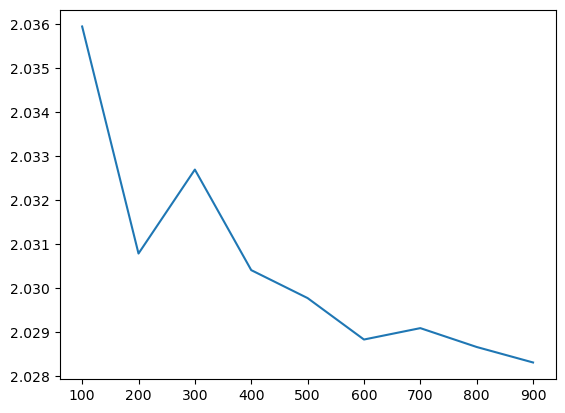

In [15]:
# 파라미터는 몇이 좋을지?
estimators_list = [100,200,300,400,500,600,700,800,900]
score_list = []

for i in estimators_list:
    rf = RandomForestRegressor(n_estimators=i)
    scores = cross_val_score(rf, t[input_var], t['target'], scoring = 'neg_mean_absolute_error', cv = 3)
    score_list.append(-scores.mean())

plt.plot(estimators_list, score_list)

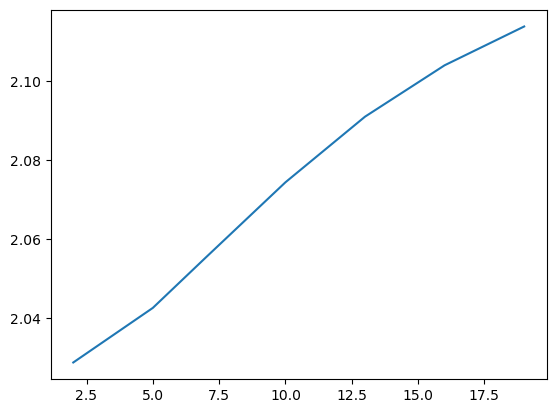

In [21]:
# 파라미터는 몇이 좋을지?(2)
minsamples_list = [2, 5, 7, 10, 13, 16, 19]
score_list = []

for i in minsamples_list:
    rf = RandomForestRegressor(n_estimators=900, min_samples_split = i)
    scores = cross_val_score(rf, t[input_var], t['target'], scoring = 'neg_mean_absolute_error', cv = 3)
    score_list.append(-scores.mean())

plt.plot(minsamples_list, score_list)

In [55]:
rf = RandomForestRegressor(n_estimators=900)
rf.fit(t[input_var], t['target'])
test['target'] = rf.predict(test[input_var])
test[['id','target']].to_csv("submission.csv", index = False)

In [ ]:
# con4만 제외한 t

### => 1.9921520366 (결과 제일 좋음)

In [58]:
rf = RandomForestRegressor(n_estimators=900)
rf.fit(t[input_var], t['target'])
test['target'] = rf.predict(test[input_var])
test[['id','target']].to_csv("submission.csv", index = False)

In [ ]:
# con4와 'pressure'이 200000보다 큰 거 제외한 t

### => 1.990261703 (조금 더 좋아졌네..?!)

In [66]:
rf = RandomForestRegressor(n_estimators=900)
rf.fit(t[input_var], t['target'])
test['target'] = rf.predict(test[input_var])
test[['id','target']].to_csv("submission.csv", index = False)

In [ ]:
# con4,con3 'pressure'이 200000보다 큰 것 제외한 t

### => 1.9922328584 (Bad)